In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import keras

In [31]:
apple = image.load_img("basedata/train/green_apple/Apple2.PNG")

In [32]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [33]:
train_dataset = train.flow_from_directory('basedata/train/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory('basedata/validation/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 19 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [34]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [36]:
model_fit = model.fit(train_dataset,
                    steps_per_epoch = 3,
                    epochs = 10,
                    validation_data = validation_dataset)

Epoch 1/10


C:\Anaconda\envs\tf\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3/3 [==============================] - 2s 436ms/step - loss: 12.7680 - accuracy: 0.4286 - val_loss: 0.6975 - val_accuracy: 0.4737
Epoch 2/10
3/3 [==============================] - 1s 294ms/step - loss: 0.3286 - accuracy: 0.8571 - val_loss: 0.5757 - val_accuracy: 0.7368
Epoch 3/10
3/3 [==============================] - 1s 306ms/step - loss: 0.3156 - accuracy: 0.7143 - val_loss: 0.2216 - val_accuracy: 0.8421
Epoch 4/10
3/3 [==============================] - 1s 293ms/step - loss: 0.5569 - accuracy: 0.7143 - val_loss: 0.5491 - val_accuracy: 0.7895
Epoch 5/10
3/3 [==============================] - 1s 337ms/step - loss: 0.1066 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 327ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 348ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 8/10
3/3 [==============

PermissionError: [Errno 13] Unable to create file (unable to open file: name = 'apples_model', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 302)

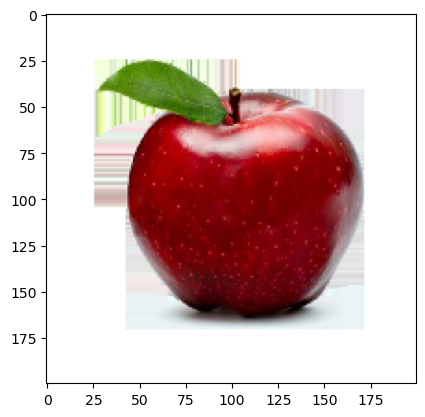

1/1 [==============================] - 0s 24ms/step
Red apple


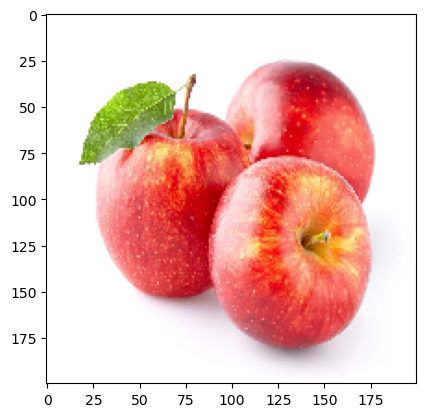

1/1 [==============================] - 0s 17ms/step
Red apple


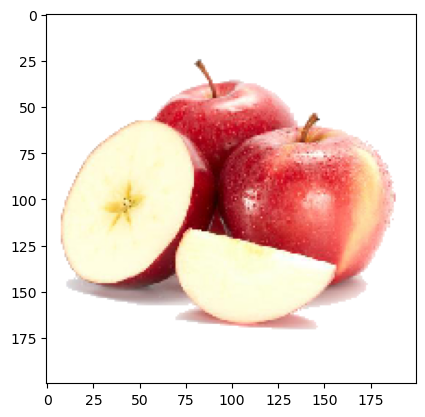

1/1 [==============================] - 0s 15ms/step
Red apple


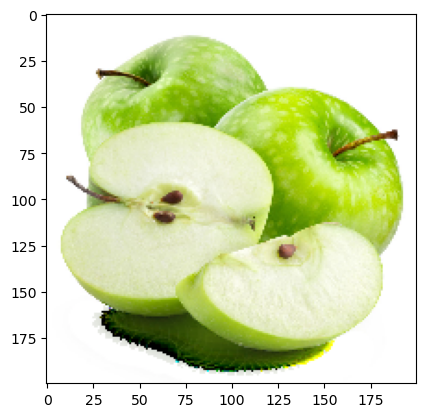

1/1 [==============================] - 0s 16ms/step
Green apple


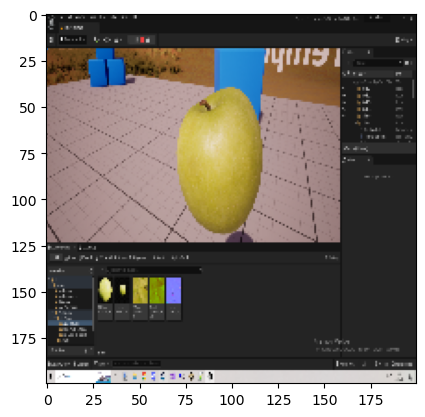

1/1 [==============================] - 0s 18ms/step
Green apple


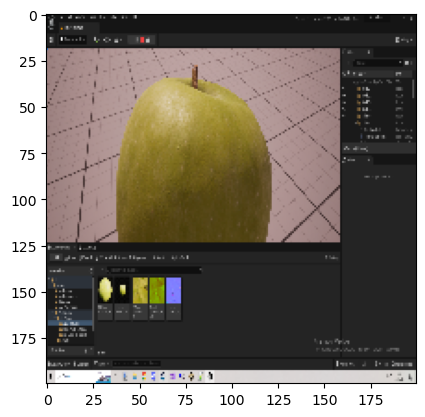

1/1 [==============================] - 0s 8ms/step
Green apple


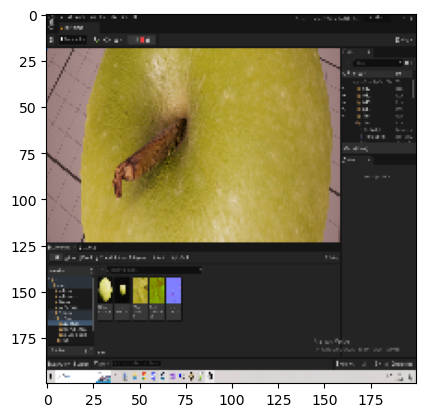

1/1 [==============================] - 0s 15ms/step
Green apple


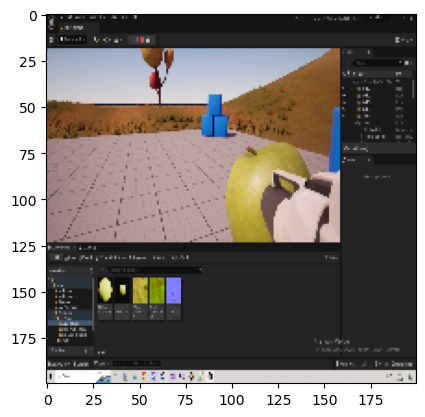

1/1 [==============================] - 0s 16ms/step
Green apple


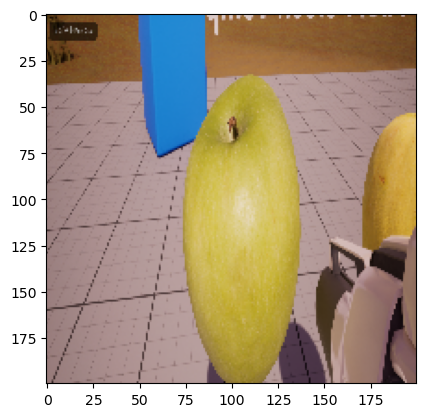

1/1 [==============================] - 0s 22ms/step
Green apple


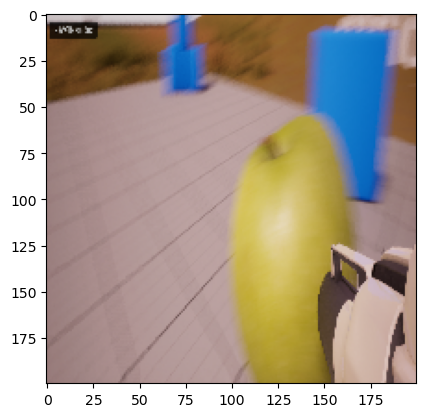

1/1 [==============================] - 0s 17ms/step
Green apple


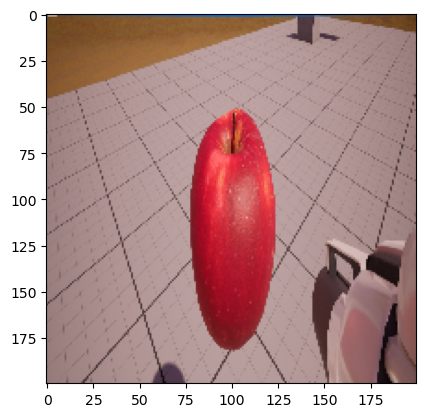

1/1 [==============================] - 0s 21ms/step
Red apple


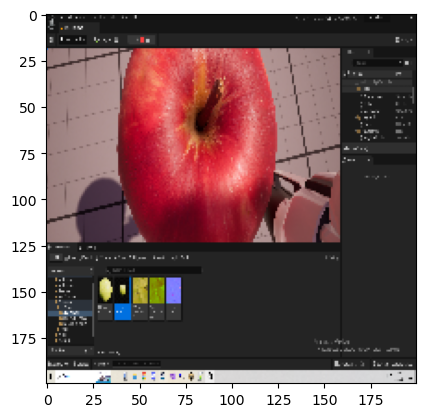

1/1 [==============================] - 0s 12ms/step
Red apple


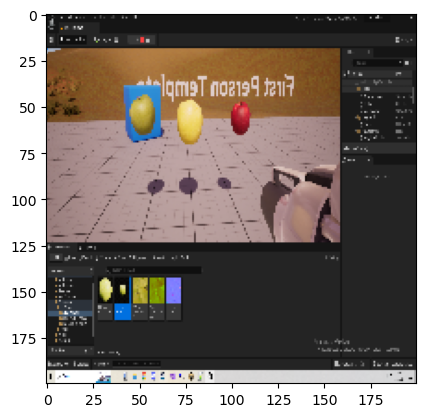

1/1 [==============================] - 0s 24ms/step
Green apple


In [29]:
dir_path = 'basedata/testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size = (200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("Green apple")
    else:
        print("Red apple") 